In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import seaborn as sns; sns.set()

In [2]:
sns.set()

###  Implementation Knutt Morris Pratt (KMP)

Written by: Kovalev Alexander  
Department:  MSU, Physics Faculty, Mathematical Modelling and Computer Sciencegr(MMCS), gr. 435    
  
  
Task: Compare perfomance hash functions

__Goal__: Find pattern in text.   
__Input__: text, pattern  
__Output__: massive with place pattern in text 

text(string) with lenght = N  
pattern(substring) with lenght = M  
M< N


__Implement two algorithm to find substrin in string__
- Knutt Morris Pratt
- Rabin Karp

__Compare KMP vs RK for chinese text__
1. Take meusure time functions
2.  Upload data from file
3. Plot graphs. 
    - How time depend from lenght text with pattern fixed
    - How time depends from lenght pattern with text size fixed


In [3]:
def prefix_table(string):
    """
    Calculate value of prefix function for each element in text
    len(string) = len(output)
    Input: string - list
    Output : list
    """
    prefix_count = 0
    mas = [0]*len(string)
    for i in range(1, len(string)):
        if string[i] == string[prefix_count]:
            prefix_count +=1
        else:
            prefix_count = 0
        mas[i] = prefix_count
    return mas


In [4]:
def KMP(text, pattern ):
    """
    Searches for a pattern in the text and outputs an array
    
    Input: 
    text - text
    pattern - pattern(substring). Wanna find it in text
     
    Output: 
    an array of locations in the text certain pattern 
    """
    shifts = prefix_table(pattern)
    initial_point = []
    m = 0; n = 0
    while n < len(text):
        if text[n] == pattern[m]:
            m += 1; n += 1
        else:
            m = shifts[m-1]   #начинаем не с первого считать, а со смещением, тот же элемент
        if m == len(pattern):
            initial_point.append(n-m)
            m = shifts[m-1]
        elif m == 0:         #на первом ошибка
            n += 1
    return initial_point




In [5]:
# Пример кода
A = "asdddadsfasfsdasdfasdaasfgafsgsdaqs"
A = A
sub = "sf"
index_KMP = KMP(A, sub)
index_KMP

[7, 10, 23]

### Implementation Rabina Karpa(RK)
##### Implement hash function
  
  
$ hash(p[1:m+1])=\sum_{i=1}^m p[i]x^{m-i} mod(q)$



In [6]:
def RK(A, sub, d=257, q=40):
    """
    Input: A - text, sub - pattern(substring)
    Searches for a substring in the string and outputs an array
    Using algorith Rabina Karpa with parameters hash functions - d, q
    Asymptotics O(N+M) 
    Output: an array of locations in the text substring 
    """
    n = len(A)
    m = len(sub)
    h = pow(d,m-1)%q
    result = []
    p = 0 # hash for pattern
    t = 0 # hash for text
    for i in range(m): # We obtain the initial values hash for the pattern and substring
        p = (d*p+ord(sub[i]))%q
        t = (d*t+ord(A[i]))%q
    
    for s in range(n-m+1): 
        if p == t: # Побуквенная проверка
            match = True
            for i in range(m):
                if sub[i] != A[s+i]:
                    match = False
                    break
            if match:
                result.append(s)
        if s < n-m: # recalculate the hash for a substring
            t = (t-h*ord(A[s]))%q # delete first
            t = (t*d+ord(A[s+m]))%q # add next 

    return result

In [7]:
# Check our algorithms on simple examples
A = "asdddadsfasfsdasdfasdaasfgafsgsdaqs"
A = A*10
sub = "fasfsdas"
index_RK = RK(A, sub)
index_KMP = KMP(A, sub)
print(index_RK,'\n', index_KMP)
print(index_RK == index_KMP)



[8, 43, 78, 113, 148, 183, 218, 253, 288, 323] 
 [8, 43, 78, 113, 148, 183, 218, 253, 288, 323]
True


### Compare KMP vs RK for chinese text
1. Take meusure time functions
2.  Upload data from file
3. Plot graphs. 
    - How time depend from lenght text with pattern fixed
    - How time depends from lenght pattern with text size fixed


In [8]:
def meusure_time(fun, A, sub, lenghts = [1000]):
    """Summary of function
    function computes time work of algorith for different lenghts of text
    Parameters: 
    fun - algorithm
    A - text
    sub - pattern
    lenghts - lenghts of text. It can be list. 
    
    Output: array of working time for differrent lenghts
    len(output) == len(lenghts
    """
    mas = []
    N = 3 # on what we take the average 
    
    for i in tqdm(lenghts): # progress bar
        interval = 0
        for j in range(N):
            start_time = time.time()
            fun(A[:i], sub)
            end_time = time.time()
            interval += end_time - start_time
        mas.append((interval)/N)
    return mas



### Work with text

In [9]:
# upload text from file
import codecs
file = codecs.open( "Chinese.txt", 'r',"utf-8" )
data = file.read() 
file.close()


In [10]:
# increase size of text by repeating
data = data*20
data = data[:500000]
data = data*2
#data = data # 2550700


In [11]:
sub= '每个地主必须养着几个外国人作保护者'

print(" Size of text: ",len(data),'\n',
      "Size of substring(pattern):", len(sub))

 Size of text:  1000000 
 Size of substring(pattern): 17


In [12]:
index_KMP =KMP(data, sub)
index_RK =RK(data, sub)
print(len(index_KMP), len(index_KMP))
print(index_KMP==index_RK)

158 158
True


### The running time depending on the length of the text(fixed  len(sub) = 17)

In [13]:
k = 1000
lenghts = [i for i in range(100*k, 1000*k, 100*k)]
mas1 = meusure_time(RK, data, sub, lenghts)
mas2 = meusure_time(KMP, data, sub, lenghts)



100%|████████████████████████████████████████████| 9/9 [00:10<00:00,  1.49s/it]


Text(0.5, 1.0, 'Compare  KMP and RK when len(pattern) = 17')

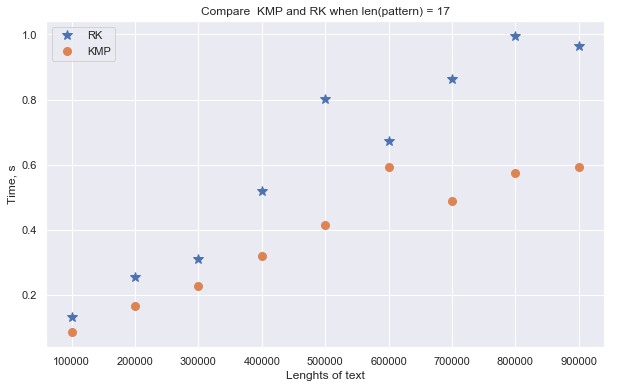

In [14]:

plt.figure(figsize = (10,6))
plt.plot(lenghts, mas1, '*', label='RK', ms=10)
plt.plot(lenghts, mas2, 'o', label ='KMP', ms=8)
plt.xlabel('Lenghts of text'); plt.ylabel('Time, s')
plt.legend()
plt.title('Compare  KMP and RK when len(pattern) = 17')

In [15]:

sub = data[:100000]
sub_str = []

for i in range(1000, 100000+1, 10000):
    sub_str.append(sub[:i])

print("Number substring in sub_str: ", len(sub_str)) 
print("Lenghts these substring in sub_str: ",*[len(i) for i in sub_str])


Number substring in sub_str:  10
Lenghts these substring in sub_str:  1000 11000 21000 31000 41000 51000 61000 71000 81000 91000


In [16]:
mas_1 = []
mas_2 = []
k = 1000
lenght = [800*k]
for sub in sub_str:
    mas_1.append(meusure_time(RK, data, sub, lenght))
    mas_2.append(meusure_time(KMP, data, sub, lenght))
    

100%|████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]


[1000, 11000, 21000, 31000, 41000, 51000, 61000, 71000, 81000, 91000]


Text(0.5, 1.0, 'Compare KMP vs RK when len(text) = 800 000')

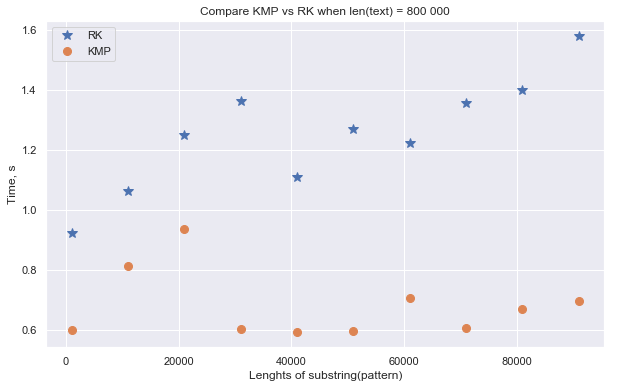

In [17]:
mas_x = [len(i) for i in sub_str]
print(mas_x)
plt.figure(figsize = (10,6))
plt.plot(mas_x, mas_1, '*', label='RK', ms=10)
plt.plot(mas_x, mas_2, 'o', label ='KMP', ms=8)
plt.xlabel('Lenghts of substring(pattern)'); plt.ylabel('Time, s')
plt.legend()
plt.title('Compare KMP vs RK when len(text) = 800 000')